In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
def print_title(title):
    print(f'\n{'-'*60}\n\033[1m{title}\033[0m')
def print_section(title):
    print(f'{'-'*60}\n{title}\n{'-'*60}')

# 1. Loading and Preprocessing 

In [4]:
# importing and reaing the data
cp = pd.read_csv('CarPrice.csv')
cp=pd.DataFrame(cp)
cp.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Data frme Description
cp.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# DataFrane info
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# Null value finding
cp.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# Datafarame Duplicate row finding
cp.duplicated().sum()

0

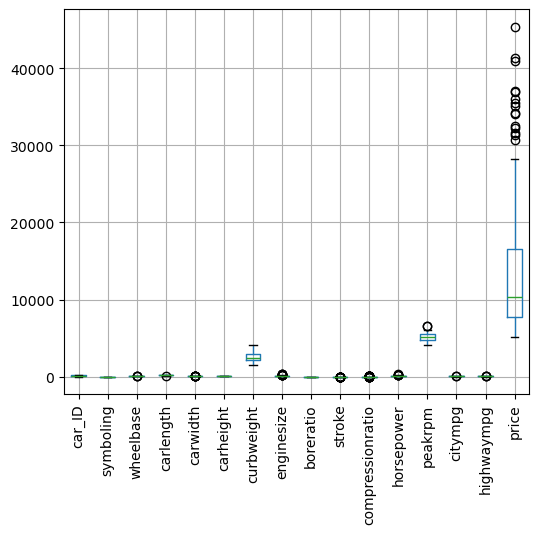

In [9]:
# Visualizing outliers of dataset before processing 
plt.figure(figsize =(6,5))
cp.boxplot()
plt.xticks(rotation=90) 
plt.show()

In [10]:
## finding object-type Features columns in dataframe and this will be compayer after encoding the object-type features
object_cols = [col for col in cp.columns if cp[col].dtype == 'object']
object_cols_df = pd.DataFrame(object_cols)
object_cols_df.columns = ['Object_column']
print(f'Object data type columns:\n{object_cols_df}\n\nThe total count of Object Columns is {len(object_cols)}')

Object data type columns:
    Object_column
0         CarName
1        fueltype
2      aspiration
3      doornumber
4         carbody
5      drivewheel
6  enginelocation
7      enginetype
8  cylindernumber
9      fuelsystem

The total count of Object Columns is 10


In [11]:
print(f'total num of unique value in CarName: {len(cp['CarName'].unique())}')
print(f'total num of unique value in fueltype: {len(cp['fueltype'].unique())}, {(cp['fueltype'].unique())}')
print(f'total num of unique value in aspiration: {len(cp['aspiration'].unique())} {(cp['aspiration'].unique())}')
print(f'total num of unique value in doornumber: {len(cp['doornumber'].unique())} {(cp['doornumber'].unique())}')
print(f'total num of unique value in carbody: {len(cp['carbody'].unique())} {(cp['carbody'].unique())}')
print(f'total num of unique value in drivewheel: {len(cp['drivewheel'].unique())} {(cp['drivewheel'].unique())}')
print(f'total num of unique value in  enginelocation: {len(cp['enginelocation'].unique())} {(cp['enginelocation'].unique())}')
print(f'total num of unique value in enginetype: {len(cp['enginetype'].unique())} {(cp['enginetype'].unique())}')
print(f'total num of unique value in  cylindernumber: {len(cp['cylindernumber'].unique())} {(cp['cylindernumber'].unique())}')
print(f'total num of unique value in fuelsystem: {len(cp['fuelsystem'].unique())} {(cp['fuelsystem'].unique())}')

total num of unique value in CarName: 147
total num of unique value in fueltype: 2, ['gas' 'diesel']
total num of unique value in aspiration: 2 ['std' 'turbo']
total num of unique value in doornumber: 2 ['two' 'four']
total num of unique value in carbody: 5 ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
total num of unique value in drivewheel: 3 ['rwd' 'fwd' '4wd']
total num of unique value in  enginelocation: 2 ['front' 'rear']
total num of unique value in enginetype: 7 ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
total num of unique value in  cylindernumber: 7 ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
total num of unique value in fuelsystem: 8 ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


### OrdinalEncoding
#### OrdinalEncoding method used for having more control over mapping

In [13]:
# Encoding for 'cylindernumber' and 'doornumber' Feature value
from category_encoders import OrdinalEncoder
Enco_cp = cp
mapping = [{'col':'cylindernumber','mapping':{'two':2,'four':4,'six':6, 'five':5, 'three':3, 'twelve':12,'eight':8}},{'col':'doornumber','mapping':{'two':2,'four':4,}}]
encoder = OrdinalEncoder(mapping=mapping)
Enco_cp = encoder.fit_transform(Enco_cp)

In [14]:
# crate dictionary for OrdinalEncoder
uniqu = Enco_cp['CarName'].unique()
print(f'The cont of unique name in uniqu df is {len(uniqu)} and count of unique name in original df of encoding is {len(Enco_cp['CarName'].unique())}')
print()
uniqu_df = pd.DataFrame(uniqu)
uniqu_df = uniqu_df.reset_index(drop=True)
uniqu_df.columns=['Uniqu_CarName']
uniqu_df['CarName_Enco'] = uniqu_df.index + 1  
# Create the dictionary
map_dict = pd.Series(uniqu_df['CarName_Enco'].values, index=uniqu_df['Uniqu_CarName']).to_dict()

The cont of unique name in uniqu df is 147 and count of unique name in original df of encoding is 147



In [15]:
# Encoding for 'CarName' 
mapping = [{'col':'CarName','mapping':map_dict}]
encoder = OrdinalEncoder(mapping=mapping)
Enco_cp = encoder.fit_transform(Enco_cp)
Enco_cp = Enco_cp.rename(columns={'CarName': 'Car_Name'}) # renamed to avoid repeated code run

##### Custom mapping is done for all remaining object-type columns

In [17]:
# custom mapping for fueltype
name_mapping = {'gas': 1, 'diesel': 2}
Enco_cp['fueltype'] = Enco_cp['fueltype'].map(name_mapping)

In [18]:
# custom mapping for aspiration
name_mapping1 = {'std': 1, 'turbo': 2}
Enco_cp['aspiration'] = Enco_cp['aspiration'].map(name_mapping1)

In [19]:
# custom mapping for carbody
name_mapping2 = {'convertible':1, 'hatchback':2, 'sedan':3, 'wagon':3, 'hardtop':4}
Enco_cp['carbody'] = Enco_cp['carbody'].map(name_mapping2)

In [20]:
# custom mapping for drivewheel
name_mapping3 = {'rwd':1, 'fwd':2, '4wd':3}
Enco_cp['drivewheel'] = Enco_cp['drivewheel'].map(name_mapping3)

In [21]:
# custom mapping for enginelocation
name_mapping4 = {'front':1, 'rear':2}
Enco_cp['enginelocation'] = Enco_cp['enginelocation'].map(name_mapping4)

In [22]:
# custom mapping for enginetype
name_mapping5 = {'dohc':1, 'ohcv':2, 'ohc':3, 'l':3, 'rotor':4, 'ohcf':5, 'dohcv':6}
Enco_cp['enginetype'] = Enco_cp['enginetype'].map(name_mapping5)

In [23]:
# custom mapping for fuelsystem
name_mapping6 = {'mpfi':1, '2bbl':2, 'mfi':3, '1bbl':4, 'spfi':5, '4bbl':6, 'idi':7, 'spdi':8}
Enco_cp['fuelsystem'] = Enco_cp['fuelsystem'].map(name_mapping6)

In [24]:
Enco_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   Car_Name          205 non-null    int32  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

In [25]:
## syntex for object type columns conversion confiremation 
object_cols = [col for col in cp.columns if cp[col].dtype == 'object']
object_cols1 = [col for col in Enco_cp.columns if Enco_cp[col].dtype == 'object']
if object_cols + object_cols1 == object_cols:
    print('All Objdect type columns are converted to numerical columns')
else:
    print('Object type columns conversion are pending')

All Objdect type columns are converted to numerical columns


In [26]:
## finding the Correlation of Data Frame
cor_Enco_cp = Enco_cp.corr()

In [27]:
## scaling dataframe
Scal_cp = Enco_cp
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Scal_cp)
cp_scaled = pd.DataFrame(scaled_data, columns=Scal_cp.columns)

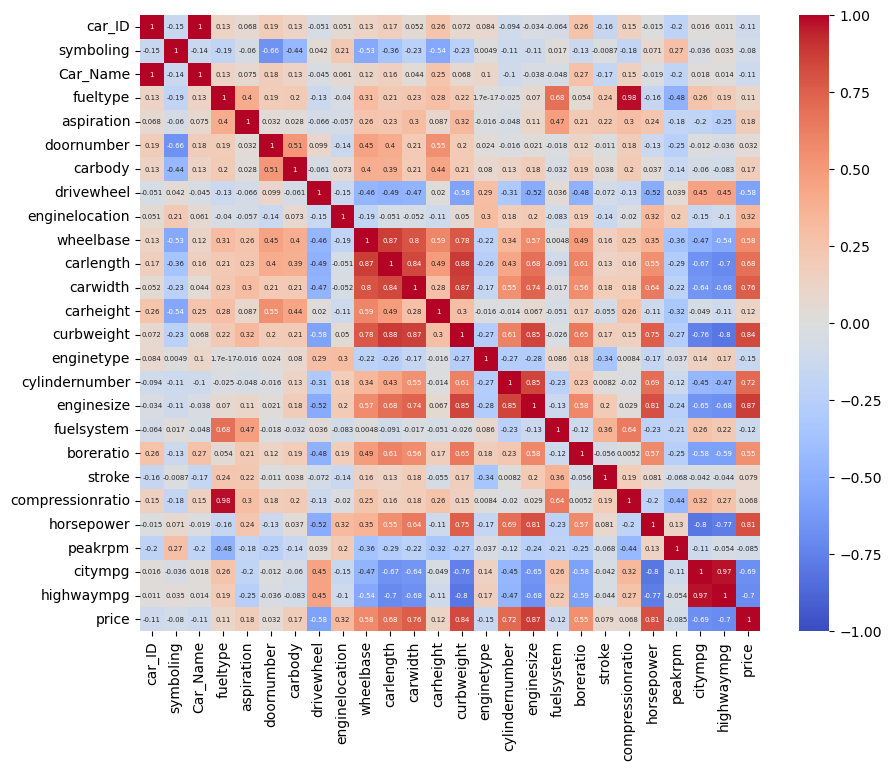

In [28]:
## finding correlation of the scaled data frame
cor_scl_cp = cp_scaled.corr()
## Plotting heatmap of Correlation
plt.figure(figsize = (10,8))
sns.heatmap(cor_scl_cp,annot=True,cmap='coolwarm',vmin=-1,vmax=1,annot_kws={"size": 5})
plt.show()

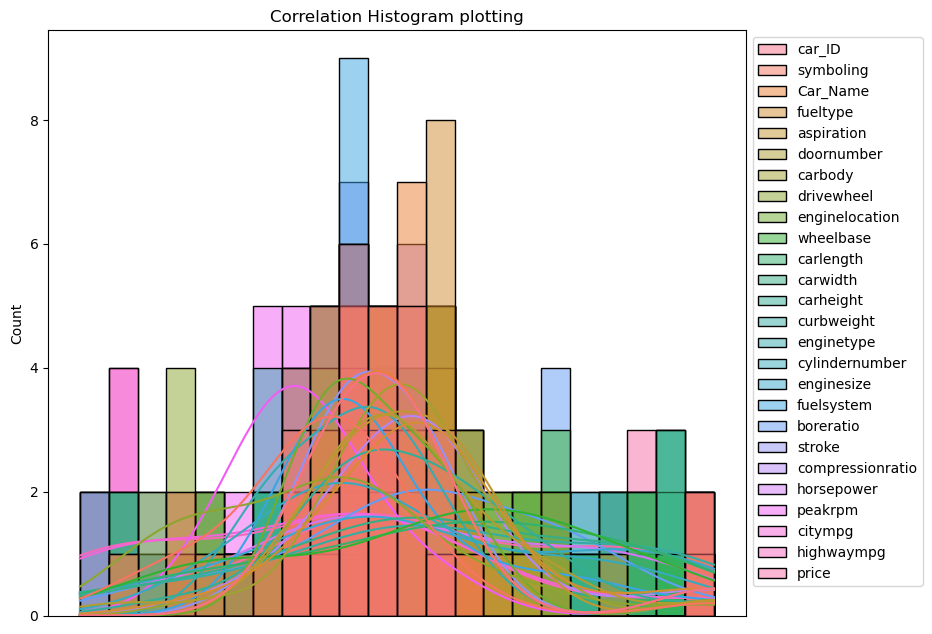

In [29]:
# Correlation plotting 
plt.figure(figsize=(9, 7.6))
plt.title("Correlation Histogram plotting")
ax=sns.histplot(data=cor_scl_cp,kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks([]) 
plt.show()

In [30]:
skewness = cp_scaled.skew()
print(skewness)

car_ID              0.000000
symboling           0.211072
Car_Name           -0.132597
fueltype            2.732619
aspiration          1.673832
doornumber         -0.247552
carbody            -0.415674
drivewheel          0.058352
enginelocation      8.143531
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginetype          0.390540
cylindernumber      2.817459
enginesize          1.947655
fuelsystem          1.539368
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64


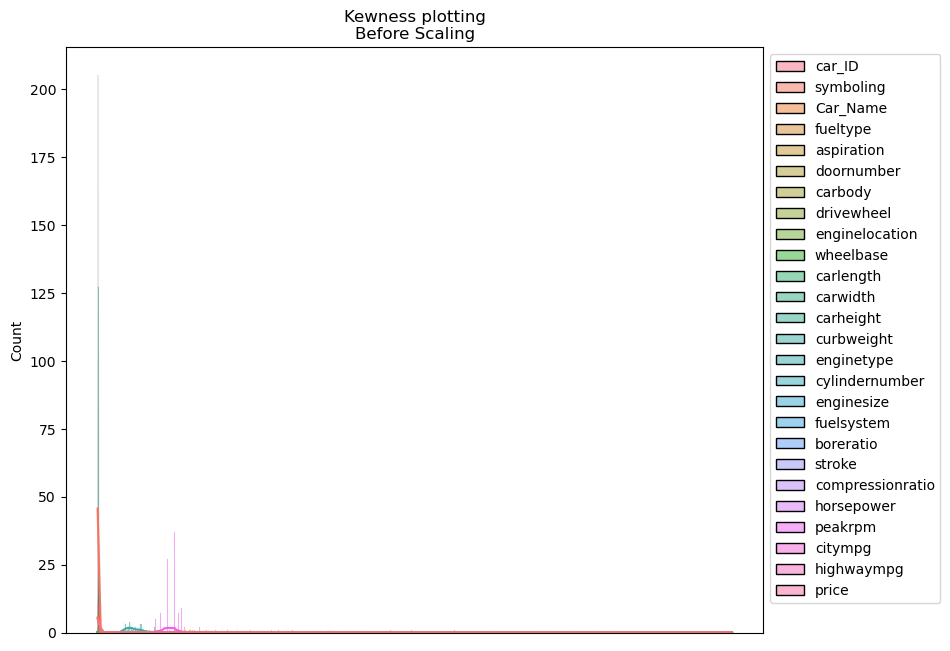

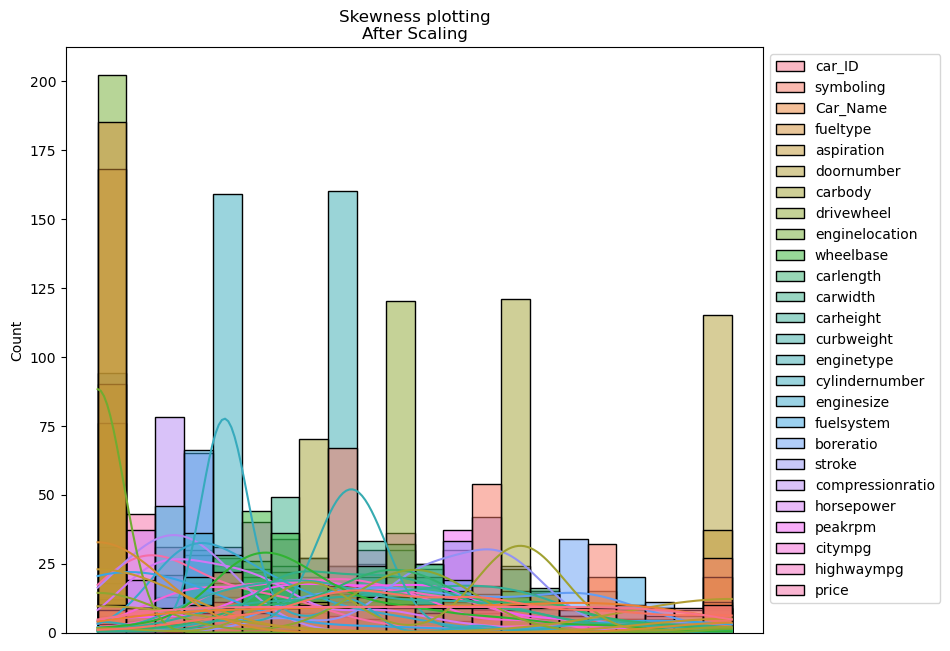

In [31]:
#Skewness plotting before mapping and scaling
plt.figure(figsize=(9, 7.6))
plt.title("Kewness plotting\nBefore Scaling")
ax=sns.histplot(data=Enco_cp,kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks([]) 
plt.show()

#skewness after mapping and scaling
plt.figure(figsize=(9, 7.6))
plt.title("Skewness plotting\nAfter Scaling")
ax=sns.histplot(data=cp_scaled,kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks([]) 
plt.show()

#### Removing outliers using IQR method

In [33]:
#IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5*IQR)
        upper = Q3 + (1.5*IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

#### Renaming final data 

In [35]:
cp_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    float64
 1   symboling         205 non-null    float64
 2   Car_Name          205 non-null    float64
 3   fueltype          205 non-null    float64
 4   aspiration        205 non-null    float64
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    float64
 7   drivewheel        205 non-null    float64
 8   enginelocation    205 non-null    float64
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    float64
 15  cylindernumber    205 non-null    float64
 16  enginesize        205 non-null    float64
 1

In [36]:
Car_price = cp_scaled

In [37]:
Car_price = outliers(Car_price)
Car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    float64
 1   symboling         205 non-null    float64
 2   Car_Name          205 non-null    float64
 3   fueltype          205 non-null    float64
 4   aspiration        205 non-null    float64
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    float64
 7   drivewheel        205 non-null    float64
 8   enginelocation    205 non-null    float64
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    float64
 15  cylindernumber    205 non-null    float64
 16  enginesize        205 non-null    float64
 1

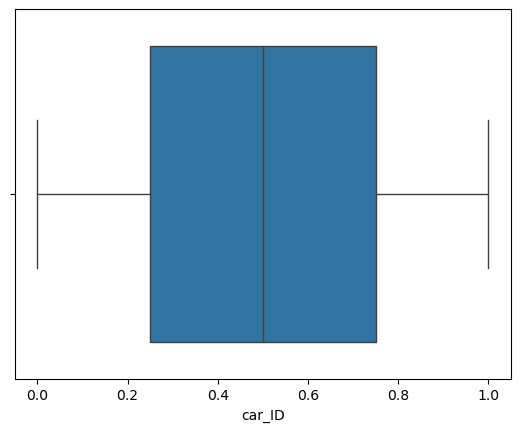

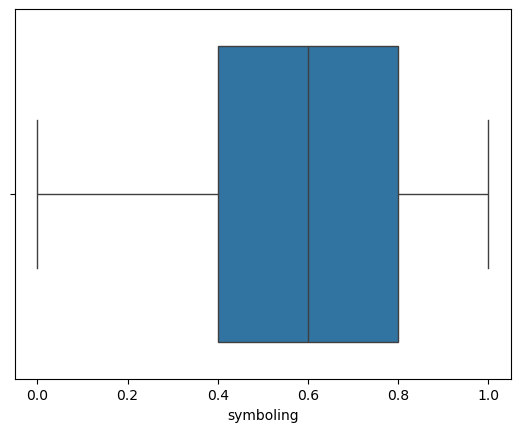

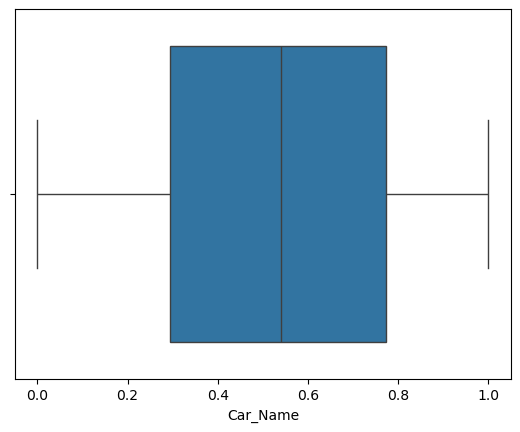

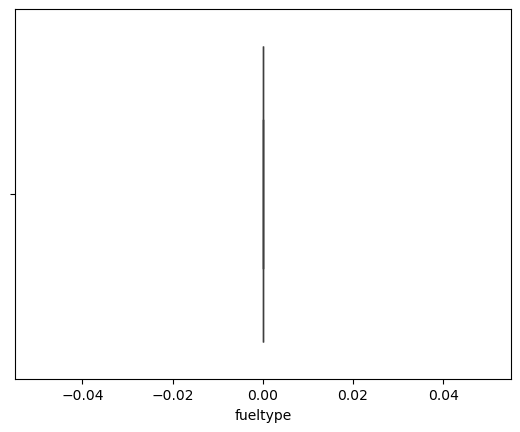

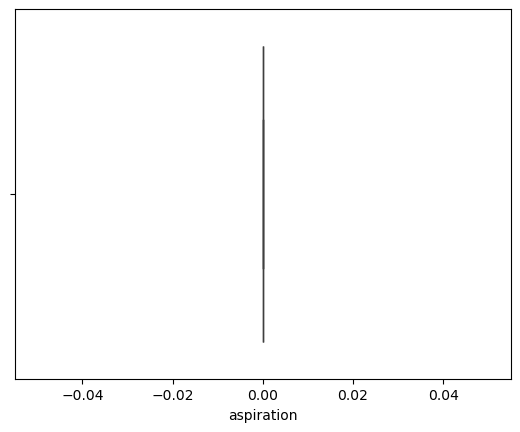

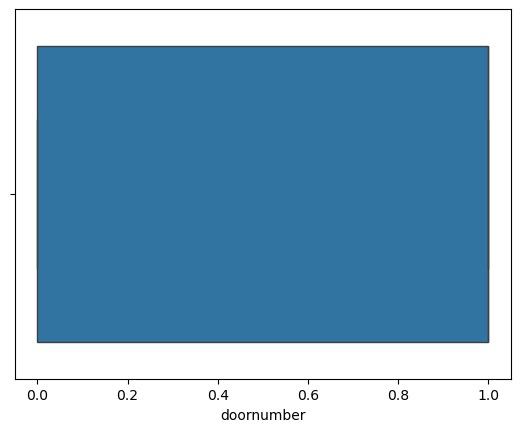

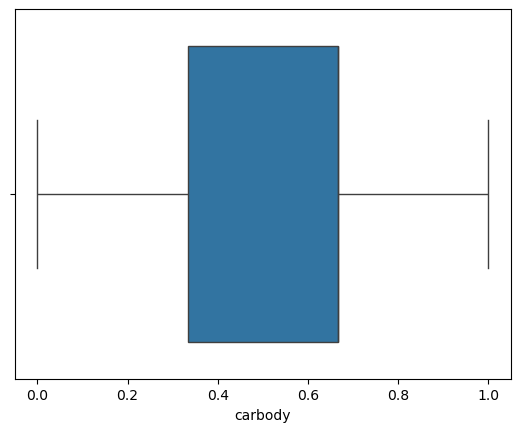

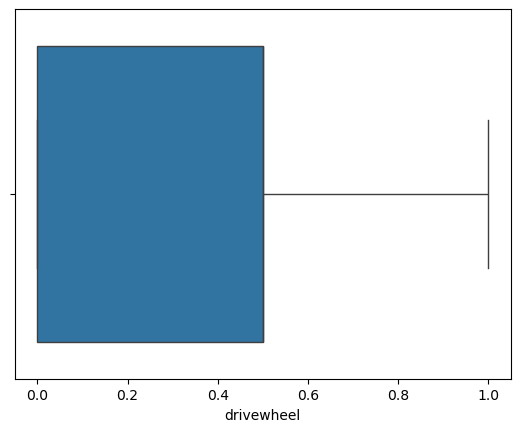

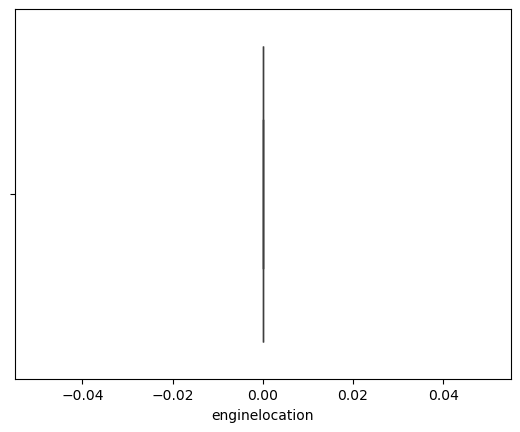

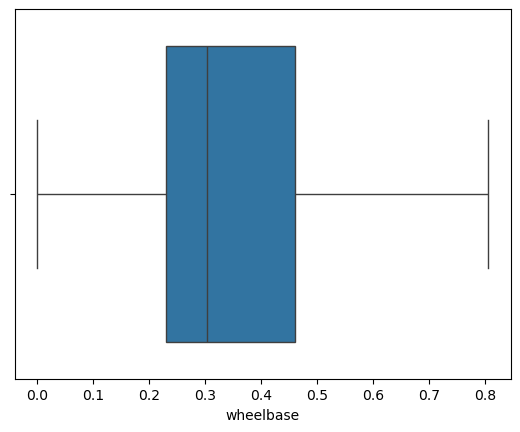

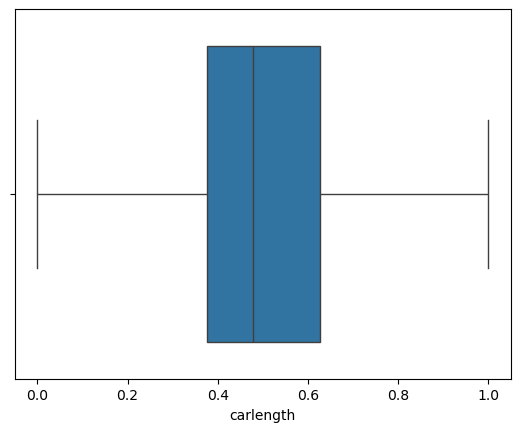

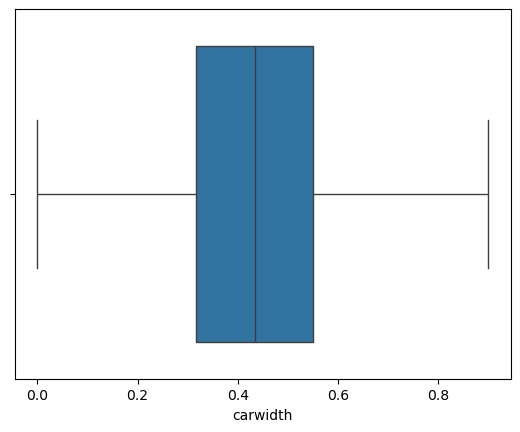

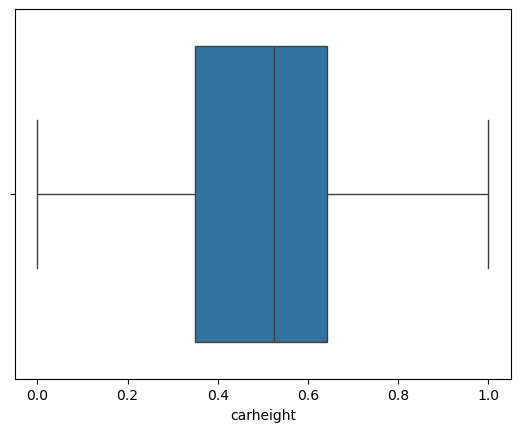

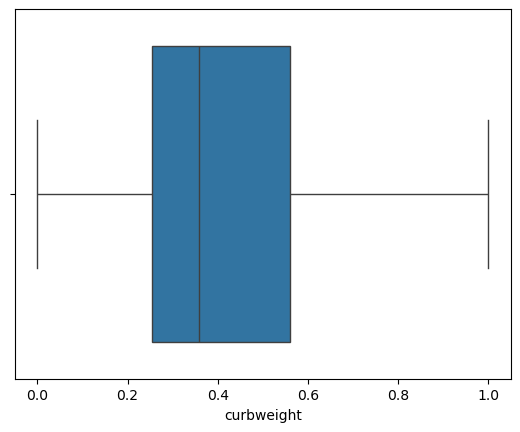

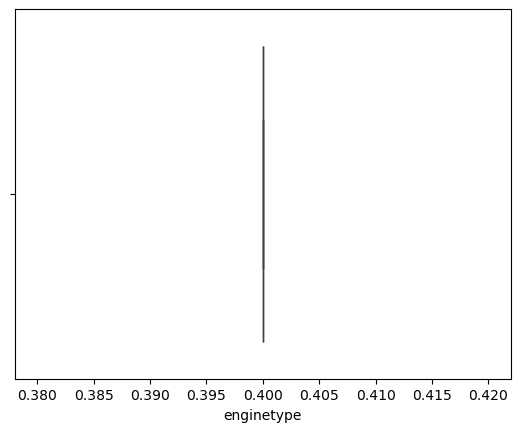

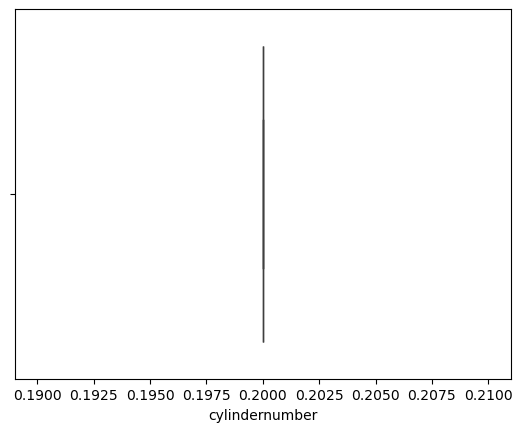

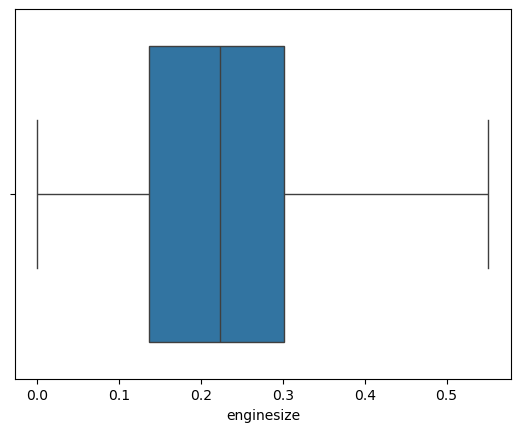

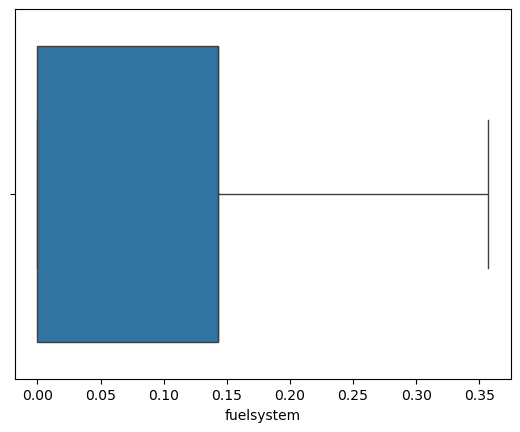

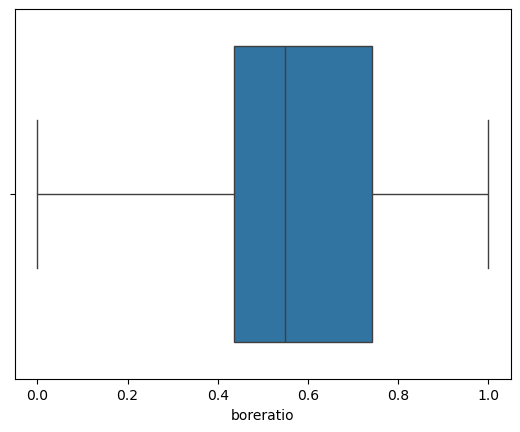

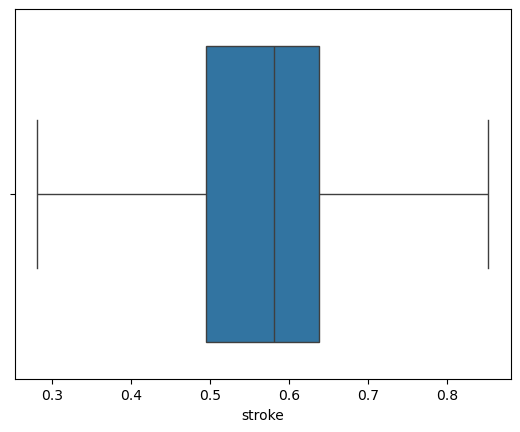

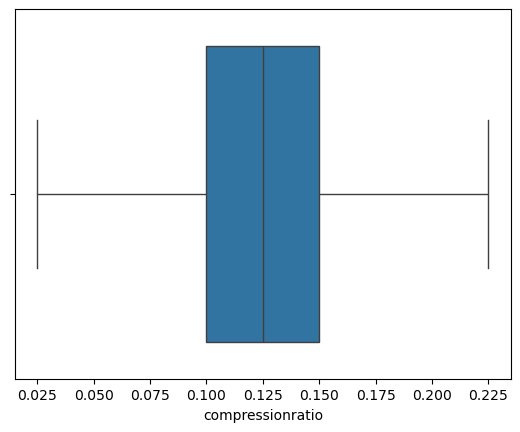

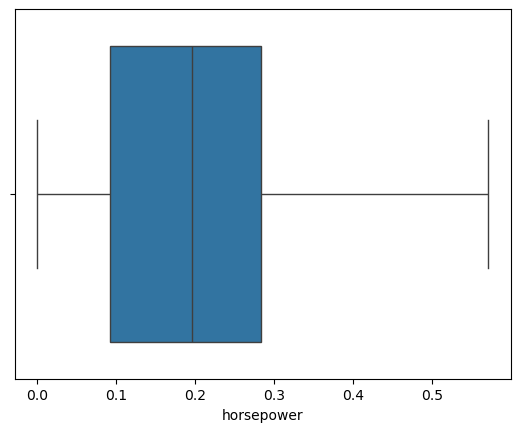

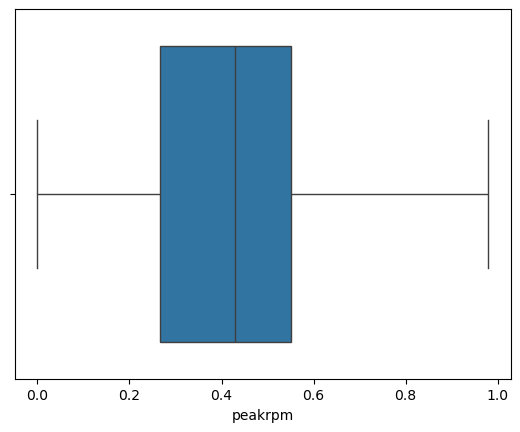

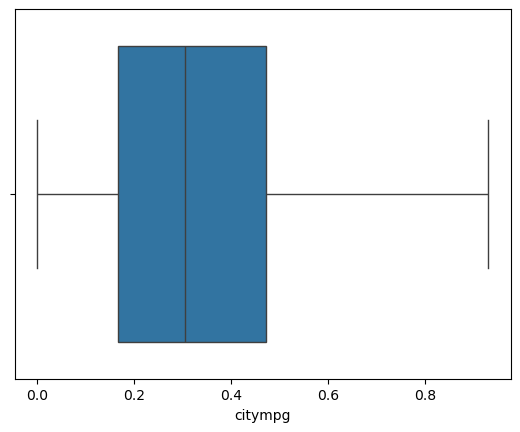

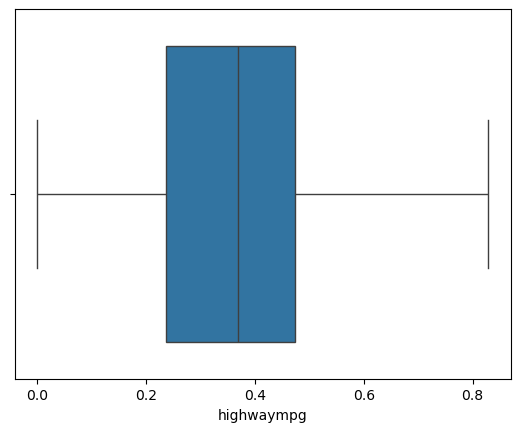

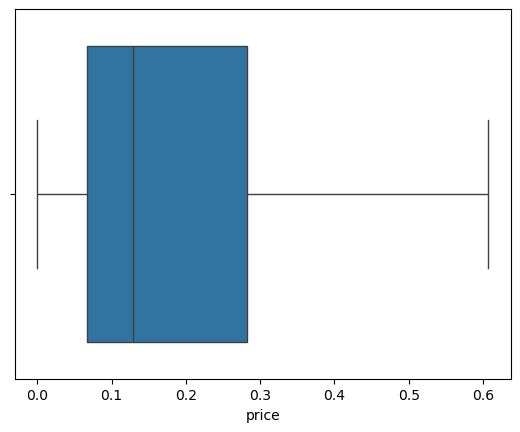

In [38]:
## ploting boxplot to visualise removed outliers
for i in Car_price.columns:
    sns.boxplot(data=Car_price,x=i)
    plt.show()

# 2.Model Implementation

In [40]:
# Assainginn x value and y value as Fetures and target
x=cp_scaled.drop(columns='price')
y=cp_scaled['price']

#### 1)Linear Regression

In [42]:
# syntex of traning and testing for linear regression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5) 

In [43]:
from sklearn.linear_model import LinearRegression
#syntes for linear regression modeling
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [44]:
# Sytax for model Prediction
y_pred = model.predict(x_test)
print(y_pred)

[0.0173999  0.04114517 0.26544993 0.51049577 0.08589462 0.24499946
 0.36402258 0.07779068 0.04451748 0.03283352 0.0672954  0.07635405
 0.07446685 0.2553732  0.09497911 0.08987182 0.22474338 0.53989787
 0.03839838 0.02304198 0.01413171 0.13812371 0.13675742 0.33336011
 0.11148947 0.17399271 0.2307172  0.04856993 0.29493778 0.052302
 0.08707402 0.01230129 0.30648486 0.1690059  0.11836766 0.12674929
 0.14777943 0.60542014 0.46073699 0.05247625 0.07869153]


In [45]:
# Sytax for model score
score_LinearRegression = model.score(x_test,y_test)
score_LinearRegression

0.9218232858292736

#### 2)Decidion Tree Regressor

In [47]:
#syntax of traning and testing for Decidion Tree Regressor
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
#syntas for Decidion Tree Regressor modeling
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(random_state=42)  
model1.fit(x1_train, y1_train)

DecisionTreeRegressor(random_state=42)

In [49]:
#syntax for model prediction 
y1_pred = model1.predict(x1_test)
print(y1_pred)

[0.60715704 0.28399782 0.09510451 0.17506579 0.60715704 0.00191152
 0.04468497 0.08043295 0.09440941 0.07142148 0.17506579 0.07298545
 0.21168264 0.15217715 0.60715704 0.03028648 0.00697582 0.18981183
 0.04644754 0.09510451 0.12727769 0.23040068 0.05910829 0.00672757
 0.06183903 0.60715704 0.08269202 0.28293034 0.05910829 0.2697731
 0.60715704 0.03850355 0.04138325 0.34573755 0.07047813 0.60715704
 0.16324909 0.16699767 0.0942977  0.24206842 0.10865895]


In [50]:
#sytex for model score
score_DecisionTreeRegressor = model1.score(x1_test,y1_test)
score_DecisionTreeRegressor

0.9545150840364851

#### 3)RandomForestRegressor

In [52]:
#syntax of traning and testing for RandomForestRegressor
x2_train,x2_test,y2_train,y2_test=train_test_split(x, y, test_size=0.2,random_state=42)

In [53]:
#syntas for RandomForestRegressor modeling
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(random_state=42)
model2.fit(x2_train,y2_train)

RandomForestRegressor(random_state=42)

In [54]:
# syntax of model prediction
y2_pred = model2.predict(x2_test)
print(y2_pred)

[0.60248101 0.34357182 0.09436721 0.19631374 0.50423291 0.03565563
 0.06862867 0.07303436 0.10732858 0.07418524 0.21084082 0.07193039
 0.21741274 0.1443836  0.60715704 0.03391614 0.01339506 0.22582171
 0.08858175 0.09936547 0.13185939 0.24552319 0.05238792 0.01416836
 0.05285115 0.60574189 0.09671913 0.28936448 0.05539943 0.28403158
 0.50567524 0.03384365 0.07140212 0.348156   0.07165384 0.50048856
 0.11344124 0.18313688 0.0584498  0.23754655 0.07887121]


In [55]:
# syntax of model score
score_RandomForestRegressor = model2.score(x2_test,y2_test)
print(score_RandomForestRegressor)

0.9568274904378331


#### 4)GradientBoostingRegressor

In [57]:
# Syntax of traning and testing for Gradient boosting regressor
x3_train,x3_test,y3_train,y3_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
# syntax for GradientboostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor(random_state = 42)
model3.fit(x3_train,y3_train)

GradientBoostingRegressor(random_state=42)

In [59]:
# Syntax of model prediction
y3_pred = model.predict(x3_test)
print(y3_pred)

[ 0.50408979  0.31074129  0.10535158  0.199467    0.51442429  0.01230129
  0.04451748  0.03366744  0.13834713  0.08050286  0.1690059   0.05779177
  0.28184428  0.10256637  0.55473401  0.01413171 -0.06475342  0.21771767
  0.10351905  0.13108738  0.13971486  0.36231498  0.04322966  0.01511448
  0.07779068  0.50523767  0.19733959  0.27348636  0.02185689  0.24499946
  0.47402081  0.01740523  0.0173999   0.37884679  0.04590541  0.47502946
  0.12009852  0.14921605  0.06041256  0.22474338  0.09772654]


In [60]:
# syntax for model score
score_GradientBoostingRegressor = model3.score(x3_test,y3_test)
print(score_GradientBoostingRegressor)

0.9654483345578171


#### Support Vector Regressor(SVR)

In [62]:
# syntax of standardscaling of x and y value
scaler_x = StandardScaler()
x_scaled = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

In [63]:
# syntax of traing and testng for SVR
x4_train,x4_test,y4_train,y4_test = train_test_split(x_scaled,y_scaled, test_size=0.2,random_state=42)

In [64]:
# Syntax of DVR modeling 
from sklearn.svm import SVR
model4 = SVR(kernel='rbf',C=1.0, epsilon=0.1)
model4.fit(x4_train,y4_train.ravel())

SVR()

In [65]:
# sytax of model predictin
y4_pred = model4.predict(x4_test)
print(y4_pred)

[ 1.70411533  0.59824683 -0.86953452  0.21991343  1.41229274 -1.08769008
 -0.44380025 -0.93592188 -0.45225855 -0.59721948 -0.08104726 -0.76734628
  0.38416197 -0.14378696  2.49010599 -0.86407123 -0.22082264  0.13084676
 -0.77148585 -0.4974642  -0.51203069  0.42334069 -0.54468937 -0.46899712
 -0.81044879  1.8999882  -0.36339444  0.4711522  -0.94643054  0.50326225
  1.56182218 -0.86067676 -0.62876583  1.01176453 -0.75934718  1.39070537
 -0.3209201   0.02335724 -0.89973135  0.15776104 -0.76007862]


In [66]:
#sytex for model score
score_SVR = model4.score(x4_test,y4_test)
print(score_SVR)

0.8812822630479982


In [67]:
# List of values
values = {'LinearRegression':[score_LinearRegression], 
          'DecisionTreeRegressor':[score_DecisionTreeRegressor],
          'RandomForestRegressor':[score_RandomForestRegressor],
          'GradientBoostingRegressor':[score_GradientBoostingRegressor],
          'SVR':[score_SVR]}
df_values=pd.DataFrame(values)
max_values = df_values.max()
overall_max_value = df_values.max().max()
overall_max_value
overall_max_columns = df_values.columns[df_values.eq(overall_max_value).any()]
print(f'The highest model score of Regression model is {overall_max_columns}\nAnd the Score is {overall_max_value}')

The highest model score of Regression model is Index(['GradientBoostingRegressor'], dtype='object')
And the Score is 0.9654483345578171


# 3). Model Evelution 
### Compareing the performance of all models based on R-squred, Mean Squared Error (MSE) and Mean Absolute Error (MAE)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

##### Evaluating Linear Regression model using following metrics

In [71]:
mae_LR = mean_absolute_error(y_test,y_pred)
mse_LR = mean_squared_error(y_test,y_pred)
r2_LR = r2_score(y_test,y_pred)
print_title(f'The Evaluated performace of MSE, MAE and R-Squred Score\nfor Linear Regression model')
print_section(f'Mean Squared Error: {mse_LR}\nMean Absolute Error: {mae_LR}\nR-Squared Score: {r2_LR}')


------------------------------------------------------------
The Evaluated performace of MSE, MAE and R-Squred Score
for Linear Regression model
------------------------------------------------------------
Mean Squared Error: 0.0023150850976519604
Mean Absolute Error: 0.03594446242220855
R-Squared Score: 0.9218232858292736
------------------------------------------------------------


##### Evaluating Decision Tree Regressor model using following metrics

In [73]:
mae_DTR = mean_absolute_error(y1_test,y1_pred)
mse_DTR = mean_squared_error(y1_test,y1_pred)
r2_DTR = r2_score(y1_test,y1_pred)
print_title(f'The Evaluated performace of MSE, MAE and R-Squred Score\nfor Decidion Tree Regresso model')
print_section(f'Mean Squared Error: {mse_DTR}\nMean Absolute Error: {mae_DTR}\nR-Squared Score: {r2_DTR}')


------------------------------------------------------------
The Evaluated performace of MSE, MAE and R-Squred Score
for Decidion Tree Regresso model
------------------------------------------------------------
Mean Squared Error: 0.0014845947267692608
Mean Absolute Error: 0.027874622327227223
R-Squared Score: 0.9545150840364851
------------------------------------------------------------


##### Evaluating Random Forest Regressor model using following metrics

In [75]:
mae_RFR = mean_absolute_error(y2_test,y2_pred)
mse_RFR = mean_squared_error(y2_test,y2_pred)
r2_RFR = r2_score(y2_test,y2_pred)
print_title(f'The Evaluated performace of MSE, MAE and R-Squred Score\nfor Random Forest Regressor model')
print_section(f'Mean Squared Error: {mse_RFR}\nMean Absolute Error: {mae_RFR}\nR-Squared Score: {r2_RFR}')


------------------------------------------------------------
The Evaluated performace of MSE, MAE and R-Squred Score
for Random Forest Regressor model
------------------------------------------------------------
Mean Squared Error: 0.00140911945597086
Mean Absolute Error: 0.026968862204385824
R-Squared Score: 0.9568274904378331
------------------------------------------------------------


##### Evaluating Gradient Boosting Regressor model using following metrics

In [77]:
mae_GBR = mean_absolute_error(y3_test,y3_pred)
mse_GBR = mean_squared_error(y3_test,y3_pred)
r2_GBR = r2_score(y3_test,y3_pred)
print_title(f'The Evaluated performace of MSE, MAE and R-Squred Score\nfor Gradient Boosting Regressor model')
print_section(f'Mean Squared Error: {mse_GBR}\nMean Absolute Error: {mae_GBR}\nR-Squared Score: {r2_GBR }')


------------------------------------------------------------
The Evaluated performace of MSE, MAE and R-Squred Score
for Gradient Boosting Regressor model
------------------------------------------------------------
Mean Squared Error: 0.002743681669317043
Mean Absolute Error: 0.0418180493930531
R-Squared Score: 0.9159392607899799
------------------------------------------------------------


##### Evaluating Support Vector Regressor model using following metrics

In [79]:
mae_SVR = mean_absolute_error(y4_test,y4_pred)
mse_SVR = mean_squared_error(y4_test,y4_pred)
r2_SVR = r2_score(y4_test,y4_pred)
print_title(f'The Evaluated performace of MSE, MAE and R-Squred Score\nfor Support Vector Regressor model')
print_section(f'Mean Squared Error: {mse_SVR}\nMean Absolute Error: {mae_SVR}\nR-Squared Score: {r2_SVR}')


------------------------------------------------------------
The Evaluated performace of MSE, MAE and R-Squred Score
for Support Vector Regressor model
------------------------------------------------------------
Mean Squared Error: 0.14005505830429088
Mean Absolute Error: 0.28534068039624766
R-Squared Score: 0.8812822630479982
------------------------------------------------------------


##### Best Performing model with justification 

In [81]:
R_score = {'model':['Linear Regression','Decidion Tree Regressor','Random Forest Regressor',
                    'Gradient Boosting Regressor','Support Vector Regressor'],
           'R2_Score %':[100*r2_LR,100*r2_DTR,100*r2_RFR,100*r2_GBR,100*r2_SVR]}
R_score = pd.DataFrame(R_score)
higih= R_score['R2_Score %'].max()
low= R_score['R2_Score %'].min()
Iden_model = R_score.loc[R_score['R2_Score %'] == higih, 'model'].item()
wrost_model = R_score.loc[R_score['R2_Score %'] == low, 'model'].item()
print_title('         '"Result Comparison using R-Squared Score")
print_section(f'Compared and Identifyed model using R2_Score metric\nof \033[1m{Iden_model}\033[0m its R-Squared Score\nis \033[1m{int(higih)}%\033[0m and it has best-performing algoritham\nwtih justification. And the Wrost model\nis \033[1m{wrost_model}\033[0m its R-Squred score is \033[1m{int(low)}%\033[0m')


------------------------------------------------------------
         Result Comparison using R-Squared Score
------------------------------------------------------------
Compared and Identifyed model using R2_Score metric
of Random Forest Regressor its R-Squared Score
is 95% and it has best-performing algoritham
wtih justification. And the Wrost model
is Support Vector Regressor its R-Squred score is 88%
------------------------------------------------------------


# 4)Feature Importance Analysis

#### Identitying the significant variables affecting car prices

In [84]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
importance = model2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01921
Feature: 1, Score: 0.00098
Feature: 2, Score: 0.01325
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00055
Feature: 6, Score: 0.00168
Feature: 7, Score: 0.00197
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00653
Feature: 10, Score: 0.01077
Feature: 11, Score: 0.01080
Feature: 12, Score: 0.00467
Feature: 13, Score: 0.53391
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.24616
Feature: 17, Score: 0.00286
Feature: 18, Score: 0.00519
Feature: 19, Score: 0.00444
Feature: 20, Score: 0.00250
Feature: 21, Score: 0.04080
Feature: 22, Score: 0.00554
Feature: 23, Score: 0.02291
Feature: 24, Score: 0.06529


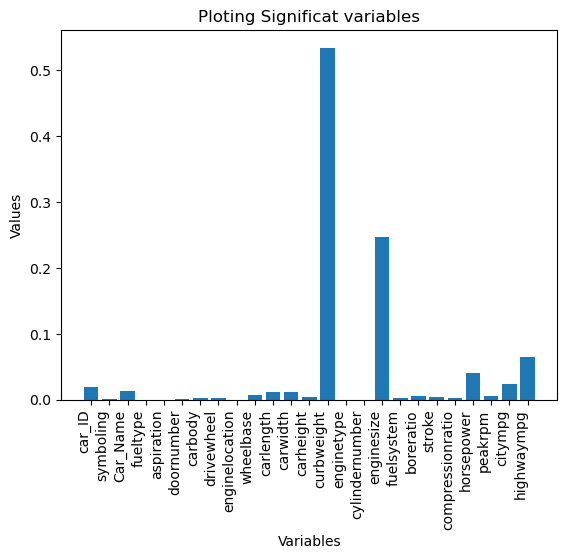

In [85]:
variables = list(x.columns.values)
variables
dic = dict(zip(variables,importance))
df_dic = pd.DataFrame([dic])
max_value = max(dic, key=dic.get)
# plot feature importance
plt.bar(variables,importance)
plt.title('Ploting Significat variables')
plt.xlabel('Variables')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Values')
plt.show()

# 5) Hyperparameter Tuning

In [228]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [217]:
x5_train, x5_test, y5_train, y5_test = train_test_split(x,y,test_size=0.3)

In [219]:
model5 = svm.SVR(kernel='rbf',C=30,gamma='auto')
model5.fit(x5_train, y5_train)

SVR(C=30, gamma='auto')

In [240]:
kernels = ['rbf','linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVR(kernel=kval,C=cval,gamma='auto'),x,y,cv=5)
        avg_scores[kval + '_' + str(cval)]=np.average(cv_scores)


In [238]:
avg_scores

{'rbf_1': 0.5987282035895402,
 'rbf_10': 0.6152560732739006,
 'rbf_20': 0.6140176596351637,
 'linear_1': 0.5885914453891583,
 'linear_10': 0.5690558781453141,
 'linear_20': 0.5715248726425439}